In [3]:
%matplotlib inline

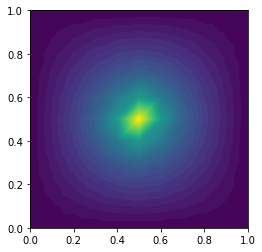

In [16]:
import sys
from dolfin import *



## Problem data

w0 = Constant(0.0)
l = Constant(1.0)
k = Constant(5.0)

## Formulation
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "P", 1)

w = TrialFunction(V)
v = TestFunction(V)

# Boundary conditions
point = Point(0.5, 0.5)
f = PointSource(V, point, 1.0)

def w0_boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w0, w0_boundary)

# Equation
a = ( inner(nabla_grad(w), nabla_grad(v)) - l**2 * inner(w, v)) * dx
L = Constant(0.0) * v * dx

# Assemble system
A, rhs = assemble_system(a, L, bc)
f.apply(rhs)

# Solve system
E = Function(V)
E_vec = E.vector()
solve(A, E_vec, rhs)

# Plot and export solution
plot(E, interactive=True)

file = File("helmhurts.pvd")
